# Text Mining Final Project 2019 - 2020

## Identifying Authors by Their Writings 

## Authors: 
- Lara Neves (m20190867) 
- Susana Paço (m20190821)
- Inês Diogo (m20190301)


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from collections import defaultdict
from pathlib import Path

import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score


In [5]:
import sys 
#!{sys.executable} -m pip install git+https://github.com/textpipe/textpipe.git
#!{sys.executable} -m pip install gensim
!{sys.executable} -m pip install keras

* [1. Data Pre-Processing](#DPP)
    
    * [1.1. Renaming txt Files](#rename)

    * [1.2. Extracting Data](#extract)
    
    * [1.3. Clearing MetaData](#ClearMD)
    
* [2. Creating a Baseline](#Baseline)

<a class="anchor" id="DPP">

## 1. Data Preprocessing



<a class="anchor" id="rename">

### 1.1. Renaming .txt Files


In [3]:
#Changing the names of the .txt files so there's no duplicates

def change_file_name(author):
    i = 0
    my_dir_path = "Data/Corpora/train/" + author
    
    for filename in os.listdir(my_dir_path): 
        
        #Define the new and old names with directory path
        new_name =str(author) + str(i) + ".txt"
        old_name = my_dir_path + '/' + filename 
        new_name = my_dir_path + '/' + new_name 
        
        #So it doesn't give out an error when it runs for the second time
        # rename all the files 
        if new_name != old_name: #IT STILL GIVES OUT ERROR
            os.rename(old_name, new_name) 
        i += 1

In [4]:
authors = ['AlmadaNegreiros','CamiloCasteloBranco','EcaDeQueiros','JoseRodriguesSantos','JoseSaramago','LuisaMarquesSilva']
authors_sigla = ['AN','CCB','EQ','JRS','JS','LMS']

#### ONLY RUN ONCE IF THE FILE NAMES ARE THE ORIGINAL otherwise, running a second time, will give an error

In [5]:
#for a in range(len(authors)):
#    change_file_name(authors[a])

<a class="anchor" id="extract">

### 1.2. Extracting Data

In [6]:
#Create a df for one author the respective .txt files in the corpora
def create_df_from_txt(author):
    my_dir_path = "Data/Corpora/train/" + author

    results = defaultdict(list)
    for file in Path(my_dir_path).iterdir():
        with open(file, "r",encoding = 'utf8') as file_open:
            results["id"].append(file.name)
            results["text"].append(file_open.read())
            results["author"] = author
            file_open.close()
    df = pd.DataFrame(results)
    
    return df

In [7]:
#Join together the dataframes from all the authors
def join_df(authors):

    df = pd.DataFrame()
    for a in range(len(authors)):
        df = df.append(create_df_from_txt(authors[a]))
    df.reset_index(inplace = True, drop = True)    
    return df 

In [8]:
### Running all the functions

#Creating the training data frame
traindf = join_df(authors)

#Replacing the name of the authors with labels of their initials
for i in range(0,len(authors)):
    traindf.author = traindf.author.replace(authors[i],authors_sigla[i])
traindf

,id,text,author
0,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN
1,AlmadaNegreiros1.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN
2,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN
3,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN
4,AlmadaNegreiros4.txt,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,AN
...,...,...,...
58,LuisaMarquesSilva4.txt,Título\ne-medo\n\nAutora (inspiradíssima)\nLuí...,LMS
59,LuisaMarquesSilva5.txt,"LISBOA 2050\nLisboa, ano de 2050. Um Agosto tã...",LMS
60,LuisaMarquesSilva6.txt,Título\nUm passeio pelo inferno\n\nAutora\nLuí...,LMS
61,LuisaMarquesSilva7.txt,Título\nRapsódia sem dó (maior)\n\nAutora\nLuí...,LMS


<a class="anchor" id="clearMD">

### 1.2. Clearing MetaData
</a>

The majority of the .txt files have metadata at the beginning. This is unnecessary and may introduce noise in our model, as such it may be a good idea to remove it. 

In [9]:
import spacy

Testing with just one of the .txt:

In [10]:
test = traindf.iloc[0:1]
test

,id,text,author
0,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN


In [11]:
def set_custom_boundaries(doc):
    # Adds support to use '\n\n\n' as the delimiter for sentence detection
    for token in doc[:-1]:
        if token.text == '\n\n\n':
            doc[token.i+1].is_sent_start = True
    return doc


nlp = spacy.load('en_core_web_sm',disable=["parser"])
nlp.add_pipe(set_custom_boundaries)
custom_sentences = nlp(test.iloc[0,1])
custom_sentences = list(custom_sentences.sents)

i=0
for sentence in custom_sentences:
    #print('**SPACE', i, '**', sentence)
    i +=1
#nlp_pt = spacy.load('pt_core_news_sm')

In [12]:
text_nometa = custom_sentences[1]

In [13]:
#WIP.... 
#Works for a few of the .txt files if the meta data is just at the beginning but not if there are too many large spaces (/n/n/n) or if there are spaces between the text

# removing crucial metadata


In [14]:
#import sys
#!{sys.executable} -m pip install -U spacy
#!{sys.executable} -m  spacy download pt_core_news_sm

In [15]:
import pt_core_news_sm
import spacy
#nlp = pt_core_news_sm.load()
spacy_nlp = spacy.load('pt_core_news_sm')

In [16]:
#author names to remove them from metadata
authors = ["José de Almada Negreiros", "José de ALMADA-NEGREIROS", "JOSÉ DE ALMADA-NEGREIROS", "Almada Negreiros", "Camilo Castelo Branco", "CAMILLO CASTELLO BRANCO", "Eça de Queirós", "Eca de Queiros", "José Rodrigues dos Santos","Jose Rodrigues dos Santos", "JOSÉ RODRIGUES DOS SANTOS", "José Saramago", "Jose Saramago", "JoSÉ SaRamago", "Luísa Marques Silva", "Luisa Marques Silva", "Luísa Marques da Silva"]  

    

In [17]:
#book names to stop words
import pandas as pd
authorsandbooks = pd.read_excel('Data/AuthorsAndBooks.xlsx')
authorsandbooks.head(3)

,Eça de Queirós,Camilo Castelo Branco,Almada Negreiros,Saramago,José Rodrigues dos Santos,Luísa Marques Silva
0,O Mistério da Estrada de Sintra,Anátema,O Moinho,Terra do Pecado,"Comunicação, Difusão Cultural, 1992; Prefácio",Acabou-se!
1,O Crime do Padre Amaro,Os Mistérios de Lisboa,Os Outros,Manual de Pintura e Caligrafia,Crónicas de Guerra I - Da Crimeia a Dachau,Sete Histórias por Acontecer
2,A Tragédia da Rua das Flores,A Filha do Arcediago,"23, 2º Andar",Levantado do Chão,Crónicas de Guerra II - De Saigão a Bagdade,e-Medo


In [18]:
#authors work to arrays

# Eça Queirós books
Eca = authorsandbooks['Eça de Queirós']
Eca = Eca.dropna()
Eca = pd.array(Eca)


#Camilo Castelo Branco books
camilo = authorsandbooks['Camilo Castelo Branco']
camilo = camilo.dropna()
camilo = pd.array(camilo)


# Almada Negreiros books
Almada = authorsandbooks['Almada Negreiros']
Almada = Almada.dropna()
Almada = pd.array(Almada)


# Saramago books
Saramago = authorsandbooks['Saramago']
Saramago = Saramago.dropna()
Saramago = pd.array(Saramago)


# José Rodrigues dos Santos books
JRodriguesSantos = authorsandbooks['José Rodrigues dos Santos']
JRodriguesSantos = JRodriguesSantos.dropna()
JRodriguesSantos = pd.array(JRodriguesSantos)


# Luísa Marques Silva books
luisaMarquesSilva = authorsandbooks['Luísa Marques Silva']
luisaMarquesSilva = luisaMarquesSilva.dropna()
luisaMarquesSilva = pd.array(luisaMarquesSilva)

In [19]:
import re
from tqdm import tqdm_notebook as tqdm #progressbar

def removemetadata(doc):
    processed_corpus = []
    for i in tqdm(range(len(doc))):
        text = doc['text'].iloc[i,]
        for w in authors:
            text = re.sub(w,"",text)
        for x in Eca:
            text = re.sub(x,"",text)
        for t in camilo:
            text = re.sub(t,"",text)
        for s in Almada:
            text = re.sub(s,"",text)
        for y in Saramago:
            text = re.sub(y,"",text)
        for n in JRodriguesSantos:
            text = re.sub(n,"",text)
        for m in luisaMarquesSilva:
            text = re.sub(m,"",text)
        processed_corpus.append(text)
    return processed_corpus

In [20]:
#create a column to test the results of removing crucial metadata text
traindf['removeMetadata'] = removemetadata(traindf)

In [21]:
traindf.head()

,id,text,author,removeMetadata
0,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN,Title: \n\nAuthor: \n\nRelease Date: September...
1,AlmadaNegreiros1.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN,Title: \n\nAuthor: \n\nRelease Date: September...
2,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN,\n\nTitle: \n\nAuthor: \n\nRelease Date: Septe...
3,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN,\nTitle: \n \n\nAuthor: \n\nContributor:...
4,AlmadaNegreiros4.txt,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,AN,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...


In [22]:
doc = spacy_nlp(test.at[0,'text'])
tokens = [token.text for token in doc if not token.is_stop]

In [23]:
#print('Original Article: %s' % (test.at[0,'text']))
#print()
#print(tokens)

<a class="anchor" id="clearTexts">

### 1.4. Cleaning Texts
</a>


In [24]:
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm_notebook as tqdm #progressbar
from unidecode import unidecode
from nltk.stem import RSLPStemmer
#nltk.download('rslp')

#### Auxiliary functions for preprocessing:

In [25]:
def lowercasing(text):       
    text = text.lower()     
    return text

def to_string(text):
    text = text.split()
    return text

def lemmatization(word):
    lem = WordNetLemmatizer()
    word =lem.lemmatize(word)
    return word

def punctuation(word):
    word = re.sub('[\“\”\ "\-\'`~!@#$%^&*()_|+=?;:,.<>\{\}\[\]\\\/]','', word)
    return word

def stopwords_nltk(word):
    stop_words = set(stopwords.words("portuguese")) 
    return word in stop_words

def stopwords_spacy(word):
    return spacy_nlp.vocab[word].is_stop

def accents(word):
    word = unidecode(word)
    return word

### Preprocessing 1
##### with punctuation and no lemmatization

In [26]:
def preprocessing_with_punc(doc, column):
    processed_corpus = []
    for i in tqdm(range(len(doc))):
        text = doc[column].iloc[i,]    
    
        text = lowercasing(text)
        
        text = to_string(text)

        textfinal = []
        for word in text:
            if stopwords_nltk(punctuation(word)) or stopwords_spacy(punctuation(word)):
                word = re.sub('[^\“\”\ "\-\'`~!@#$%^&*()_|+=?;:,.<>\{\}\[\]\\\/]','', word)
            else:
                word
            textfinal.append(word)

        text = " ".join(textfinal)
    
        processed_corpus.append(text)
         
    return processed_corpus

In [30]:
traindf['clean_with_punc'] = preprocessing_with_punc(traindf, 'removeMetadata')

### Preprocessing 2 
##### no punctuation and no lemmatization 

In [27]:
def preprocessing_no_punc(doc, column):
    processed_corpus = []
    for i in tqdm(range(len(doc))):
        text = doc[column].iloc[i,]    
    
        text = lowercasing(text)
        
        text = to_string(text)
        
        text = [punctuation(word) for word in text]

        text = [word for word in text if (not stopwords_nltk(word)) and (not stopwords_spacy(word))]
        
        text = [accents(word) for word in text] 

        text = " ".join(text)
    
        processed_corpus.append(text)
         
    return processed_corpus

In [32]:
traindf['clean_no_punc'] = preprocessing_no_punc(traindf, 'removeMetadata')

### Preprocessing 3 
##### no punctuation and with lemmatization

In [28]:
def preprocessing_clean(doc, column):
    processed_corpus = []
    for i in tqdm(range(len(doc))):
        text = doc[column].iloc[i,]    
    
        text = lowercasing(text)
        
        text = to_string(text)
        
        text = [punctuation(word) for word in text]

        text = [word for word in text if (not stopwords_nltk(word)) and (not stopwords_spacy(word))]
        
        text = [lemmatization(word) for word in text]
        
        text = [accents(word) for word in text] 

        text = " ".join(text)
    
        processed_corpus.append(text)
         
    return processed_corpus

In [29]:
traindf['clean'] = preprocessing_clean(traindf, 'removeMetadata')

## Choosing Evaluation Metrics

Can we use Accuracy as an evaluation metric? Depends if the dataset is unbalanced. Let's check:

In [30]:
traindf.iloc[:,2].value_counts()

CCB    20
JS     12
AN      9
LMS     9
JRS     8
EQ      5
Name: author, dtype: int64

It is unbalanced in favour of Camilo Castelo Branco which is why we get a higher accuracy when we use the DummyClassifier with most frequent strategy (0.31) compared to other strategies (stratified 0.22) even though it's just classifying all texts as belonging to CCB. As such accuracy may not be the best metric in this case.

Instead we will use the F1 Score as it integrates Precision and Recall simultaneously.

## Word Cloud

To see a word cloud - or the most frequent words - written by a given author just type in the function one of the following siglas: 


In [31]:
authors_sigla

['AN', 'CCB', 'EQ', 'JRS', 'JS', 'LMS']

Corresponding to the following authors:

In [32]:
authors

['José de Almada Negreiros',
 'José de ALMADA-NEGREIROS',
 'JOSÉ DE ALMADA-NEGREIROS',
 'Almada Negreiros',
 'Camilo Castelo Branco',
 'CAMILLO CASTELLO BRANCO',
 'Eça de Queirós',
 'Eca de Queiros',
 'José Rodrigues dos Santos',
 'Jose Rodrigues dos Santos',
 'JOSÉ RODRIGUES DOS SANTOS',
 'José Saramago',
 'Jose Saramago',
 'JoSÉ SaRamago',
 'Luísa Marques Silva',
 'Luisa Marques Silva',
 'Luísa Marques da Silva']

In [33]:
def word_cloud(author,text_column):
    word_cloud = " ".join(traindf[traindf['author']==author][text_column])


    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(word_cloud)
    # Display the generated image:
    plt.figure(figsize=(17,7))
    plt.title('Word Cloud from ' + author)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

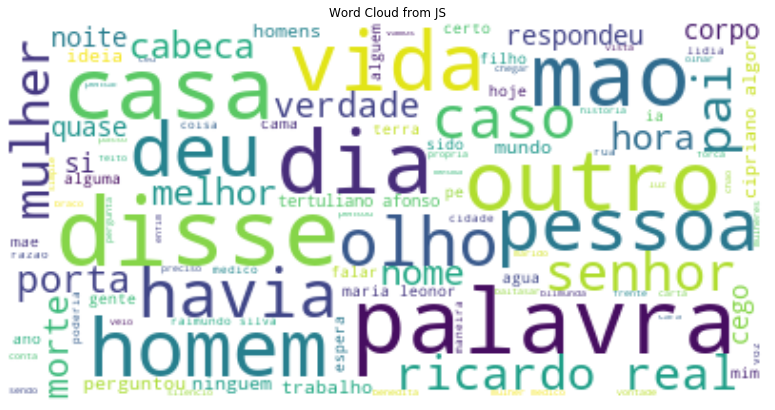

In [34]:
word_cloud('JRS','clean')

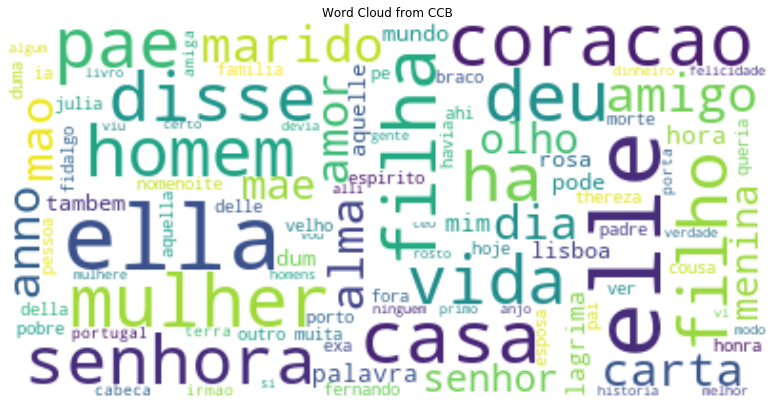

In [37]:
word_cloud('CCB','clean')

## Testing the Importance of Punctuation

We know that José Saramago has an interesting use of punctuation and it can be a factor in identifying texts from him. Does this mean that we shouldn't consider punctuations as stop-words? Let's test it.

To do so we will use a dummy classifier on two texts from Saramago and two from JRS. Will we see a difference in the performance of the classifier with or without punctuation?

In [35]:
punc_traindf = traindf[traindf.author=='JS'][1:3].append(traindf[traindf.author=='JRS'][1:3])

We will run the dummy classifier n_iter times and determine the difference between the two. If the classifier is better with punctuation we should see a _positive difference_ meaning that the classifier that runs on the text with punctuation should have a better accuracy score than the one without. 

In [36]:
n_iter = 50000
score_punc_test = []
for i in range(0,n_iter):
    score_punc_test.append(dummy_classifier_score(punc_traindf,'clean_with_punc','stratified')-dummy_classifier_score(punc_traindf,'clean','stratified'))
    i += 1
score_punc_test = pd.DataFrame(score_punc_test)

NameError: name 'dummy_classifier_score' is not defined

In [ ]:
score_punc_test.describe()

There's a very very small change between each classifiers. Which may indicate that there are no difference in the performance of the classifier of JS with or without punctuation. 

To confirm this, let's do a one sided hypothesis test, where the null hypothesis is that the mean of the difference between the scores is zero, meaning there is no difference between doing a classifier with or without punctuation for José Saramago.

In [ ]:
from scipy.stats import ttest_1samp

diff_mean = np.mean(score_punc_test)
print('mean', diff_mean)
tset, pval = ttest_1samp(score_punc_test, 0)
print('p-values', pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Reject the null hypothesis: there are evidence that the classifier performs differently if there's punctuation")
else:
  print("Do not reject the null hypothesis: there are no evidence that the classifier is better if we mantain the punctuation")

## Dividing the text into chunks of 500 words

In [38]:
def split_doc(doc,column,n):
    newdf = pd.DataFrame()
    newdf = newdf.reindex(columns = ['id','chunks','author']) 
    for i in tqdm(range(len(doc))):
        text = doc[column].iloc[i,]

        text = text.split()

        chunks = [' '.join(text[j:j+n]) for j in range(0,len(text),n)]

        for c in chunks:
            data = []
            values = [doc['id'].iloc[i,], c, doc['author'].iloc[i,]]
            a_dictionary = dict(zip(newdf.columns.tolist(), values))
            data.append(a_dictionary)
            newdf = newdf.append(data)
            
    newdf.index =[j for j in range(len(newdf))]  
              
    return newdf

In [39]:
traindf_chunks = split_doc(traindf, 'clean' ,500)

In [40]:
traindf_chunks.head(10)

,id,chunks,author
0,AlmadaNegreiros0.txt,title author release date september 16 2007 eb...,AN
1,AlmadaNegreiros0.txt,sensibilidade manchada vinho lyrio bravo flore...,AN
2,AlmadaNegreiros0.txt,negro pendao piratas heide corvo marinho beber...,AN
3,AlmadaNegreiros1.txt,title author release date september 23 2007 eb...,AN
4,AlmadaNegreiros2.txt,title author release date september 29 2007 eb...,AN
5,AlmadaNegreiros2.txt,explicam senhora homem senhoras menina loira h...,AN
6,AlmadaNegreiros2.txt,cances sorte <<nao tenhas medo estares cabeca ...,AN
7,AlmadaNegreiros2.txt,atrapalhado pensei responder verdade disse ver...,AN
8,AlmadaNegreiros2.txt,espera penso verdade for matome gosto bois bar...,AN
9,AlmadaNegreiros2.txt,sahi casa mae irmao extrangeiro infelicidade m...,AN


## Cross-validation 
We already have a test set defined however there is value in having an evaluation/development set to determine the model performance as it's being trained and to adjust the parameters.

Given the relatively small amount of data we chose to use cross-validation rather than splitting the set into training and evaluation sets.

We will do so by applying the k-fold crossvalidation method, the choice of number of folds k will be decided according to:

"... there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance." - Page 184, An Introduction to Statistical Learning, 2013.

In [ ]:
from sklearn.model_selection import KFold
#Creating a k-fold instance where the number of splits is 10
kf = KFold(n_splits=10)

In [ ]:
#Using accuracy may have to change
def evaluate_model(X,y, model):
    return model.score(X,y)

<a class="anchor" id="Baseline">

## 2. Creating a Baseline
    
</a>

Our goal now is to create a naíve baseline to compare our model with. It won't involve any pre-processing of data or removal of extra meta data.

#### 1st Try
Using DummyClassifier as a baseline? 

In [57]:
import numpy as np
from sklearn.dummy import DummyClassifier

In [58]:
def dummy_classifier_score(df,text_column,strategy):

    X = df.loc[:,text_column]
    y = df.loc[:,'author']
    dummy_clf = DummyClassifier(strategy=strategy) #stratified, most_frequent
    dummy_clf.fit(X, y)
    dummy_clf.predict(X)
    return dummy_clf.score(X, y)

In [59]:
dummy_classifier_score(traindf,'text','most_frequent')

0.31746031746031744

Using a Dummy Classifier inside a crossvalidation k-fold 

In [60]:
#Placeholder dummy classifier
def dummy_classifier_model(X,y,strategy):
    dummy_clf = DummyClassifier(strategy=strategy) #stratified, most_frequent
    model = dummy_clf.fit(X, y)
    return model

In [61]:
#For the dummy classifier
def avg_score_DC(method,X,y,strategy):
    score_train = []
    score_eval = []
    for train_index, eval_index in method.split(X):
        X_train, X_eval = X.iloc[train_index], X.iloc[eval_index]
        y_train, y_eval = y.iloc[train_index], y.iloc[eval_index]
        ####Define model:
        model = dummy_classifier_model(X_train,y_train,strategy)
        ###############
        value_train = evaluate_model(X_train, y_train, model)
        value_eval = evaluate_model(X_eval,y_eval, model)
        score_train.append(value_train)
        score_eval.append(value_eval)

    print('Train:', np.mean(score_train))
    print('Evaluation:', np.mean(score_eval))


In [62]:
avg_score_DC(kf,traindf['clean'],traindf['author'],'stratified')

Train: 0.20097117794486213
Evaluation: 0.07619047619047618


Very bad result with dummy classifier as expected. Creating a bag-of-words is probably a better choice: 
#### 2nd Try

In [145]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def bag_of_words_model(X,y):
    count_vect = CountVectorizer(
        max_df=0.8,
        max_features=10000, 
        ngram_range=(1,3)
    )
    
    X_count = count_vect.fit_transform(X)
    #using frequencies instead of occurrences in order to normalize the counts for 
    #documents that are larger compared to smaller ones -term frequency
    #As well as downscaling weights for words that occur in many documntenst in the corpus
    #and are therefore less informative 

    X_train_tfidf =  TfidfTransformer().fit_transform(X_count)
    #Now that we have the features we can train the classifier. 
    #Let's use a naive bayes classsifier in the multinomial variant as it's the most well suited for word counts
    model = MultinomialNB().fit(X_train_tfidf, y)
    return model, X_train_tfidf

In [146]:
def avg_score_baseline(method,X,y):
    #Using Bag-of-Words
    score_train = []
    score_eval = []
    for train_index, eval_index in method.split(X):
        X_train, X_eval = X.iloc[train_index], X.iloc[eval_index]
        y_train, y_eval = y.iloc[train_index], y.iloc[eval_index]
        
        ##Define model:
        model = bag_of_words_model(X_train,y_train)[0]
        
        ##Evaluation of baseline model
        #The evaluate_model functions needs to use the respective X_train with the tfid transformer.
        value_train = evaluate_model(bag_of_words_model(X_train,y_train)[1], y_train, model)
        value_eval = evaluate_model(bag_of_words_model(X_eval,y_eval)[1],y_eval, model)
        
        score_train.append(value_train)
        score_eval.append(value_eval)
        
        ##Average of Evaluation measure
    print('Train:', np.mean(score_train))
    print('Evaluation:', np.mean(score_eval))

## Testing the baseline models with different levels of Preprocessing

In [ ]:
avg_score_baseline(kf,traindf['text'],traindf['author'])

In [ ]:
avg_score_baseline(kf,traindf['removeMetadata'],traindf['author'])

In [ ]:
avg_score_baseline(kf,traindf['clean_with_punc'],traindf['author'])

In [ ]:
avg_score_baseline(kf,traindf['clean_no_punc'],traindf['author'])

In [147]:
avg_score_baseline(kf,traindf['clean'],traindf['author'])

Train: 0.7975250626566416
Evaluation: 0.3047619047619048


In [ ]:
avg_score_baseline(kf,traindf_chunks['chunks'],traindf_chunks['author'])

## Continuous Bag of Words Model

Model: FastText by Keras
FastText is very fast and strong algorithm, developed by Facebook for text classification based on Continuous Bag-of-Words model a.k.a Word2vec.



In [41]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Embedding, Add,GlobalAveragePooling1D,Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
import keras.backend as K

Using TensorFlow backend.


In [173]:
#Parameters:
maxlen = 500
min_count = 3
epochs = 200 #25
#Define which dataset and which column (which level of pre-processing) you are using:
df_fasttext = traindf_chunks #traindf
column_fasttext = 'chunks' #'clean'


In [174]:
#Evaluation metrics

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [175]:
#Run the algorithm:
def create_docs(df,column, n_gram_max=3):
    def add_ngram(q, n_gram_max):
            ngrams = []
            for n in range(2, n_gram_max+1):
                for w_index in range(len(q)-n+1):
                        ngrams.append('--'.join(q[w_index:w_index+n]))
                return q + ngrams
    def add_n_skip_gram(q, n_gram_max):
            ngrams = []
            for n in range(3, n_gram_max+1):
                for w_index in range(len(q)-n+1):
                    temp_list = [q[w_index],q[w_index+2]]
                    ngrams.append('--'.join(temp_list))
            return q + ngrams
        
    docs = []
    for doc in df[column]:
        doc = doc.split()
        docs.append(' '.join(add_ngram(doc, n_gram_max)))
    return docs

docs = create_docs(df_fasttext,column_fasttext) ##

tokenizer = Tokenizer(lower=True, filters='')
tokenizer.fit_on_texts(docs)
num_words = sum([1 for _, v in tokenizer.word_counts.items() if v >= min_count])

tokenizer = Tokenizer(num_words=num_words, lower=True, filters='')
tokenizer.fit_on_texts(docs)

word_index = tokenizer.word_index
docs = tokenizer.texts_to_sequences(docs)
docs = pad_sequences(sequences=docs, maxlen=maxlen, truncating = 'post')
input_dim = np.max(docs) + 1

def create_model(embedding_dims=20, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dims))
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(6, activation='softmax')) #Number of authors, or labels to be classified is 6
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy',f1_m,precision_m, recall_m])
    return model
model_ft = create_model()

a2c = {'AN': 0, 'CCB' : 1, 'EQ' : 2,'JRS': 3,'JS': 4,'LMS': 5}

y = np.array([a2c[a] for a in df_fasttext.author])
y = to_categorical(y)

STAMP1 = 'fast_text' 
bst_model_path1 = STAMP1 + '.h5'
model_checkpoint1 = ModelCheckpoint(bst_model_path1, save_best_only=True, save_weights_only=True)


In [176]:
#Split the training set into train and validation sets. We will not use crossvalidation in this case
from sklearn.model_selection import train_test_split 
x_train, x_val, y_train, y_val = train_test_split(docs,y, test_size=0.2)


In [177]:
hist = model_ft.fit(x_train, y_train,
                 batch_size=256,
                 validation_data=(x_val, y_val),
                 epochs=epochs,
                 callbacks=[EarlyStopping(patience=0, monitor='val_loss'), model_checkpoint1])

Train on 2638 samples, validate on 660 samples
Epoch 1/200
2638/2638 [==============================] - ETA: 1s - loss: 1.7924 - accuracy: 0.1250 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+ - ETA: 1s - loss: 1.7913 - accuracy: 0.2305 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+ - ETA: 0s - loss: 1.7903 - accuracy: 0.3021 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+ - ETA: 0s - loss: 1.7893 - accuracy: 0.3525 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+ - ETA: 0s - loss: 1.7884 - accuracy: 0.3906 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+ - ETA: 0s - loss: 1.7875 - accuracy: 0.4258 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+ - ETA: 0s - loss: 1.7866 - accuracy: 0.4526 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+ - ETA: 0s - loss: 1.7855 - accuracy: 0.4902 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+ - ETA: 0s - loss: 

In [178]:
def get_layer_outputs():
    test_image = x_train
    outputs    = [layer.output for layer in model_ft.layers]          # all layer outputs


    comp_graph = [K.function([model_ft.input] + [K.learning_phase()], [output]) for output in outputs]  # evaluation functions
    # Testing
    layer_outputs_list = [op([test_image, 1]) for op in comp_graph]

    layer_outputs = []
    for layer_output in layer_outputs_list:
        #print(layer_output[0][0].shape, end='\n-------------------\n')
        layer_outputs.append(layer_output[0][0])
    return layer_outputs_list

#get_layer_outputs()[2][0].shape
np.random.seed(7)
softmax_val = get_layer_outputs()[2][0].tolist()
softmax_label = pd.DataFrame(softmax_val, columns = ['AN','CCB','EQ','JRS','JS','LMS'])
a2c = {0: 'AN', 1 : 'CCB', 2 : 'EQ', 3 : 'JRS', 4 : 'JS', 5 : 'LMS'}

#Displays the ground truth for each chunk
y_str = []
for value in y_train:
    if value[0] == 1:
        y_str.append('AN')
    if value[1] == 1:
        y_str.append('CCB')
    if value[2] == 1:
        y_str.append('EQ')
    if value[3] == 1:
        y_str.append('JRS')
    if value[4] == 1:
        y_str.append('JS')
    if value[5] == 1:
        y_str.append('LMS')

author_label = pd.DataFrame(y_str, columns = ['author'])
result = pd.concat([softmax_label, author_label],axis=1)
result

,AN,CCB,EQ,JRS,JS,LMS,author
0,0.000651,0.993666,0.003340,0.001073,0.000961,0.000308,CCB
1,0.001326,0.989740,0.003752,0.002133,0.002612,0.000438,CCB
2,0.000938,0.991398,0.005642,0.001118,0.000569,0.000334,CCB
3,0.000308,0.000296,0.000108,0.005104,0.992906,0.001278,JS
4,0.000012,0.000218,0.000050,0.998671,0.000921,0.000128,JRS
...,...,...,...,...,...,...,...
2633,0.002736,0.003252,0.990968,0.001032,0.001030,0.000982,EQ
2634,0.000515,0.996521,0.001879,0.000522,0.000411,0.000151,CCB
2635,0.000009,0.000136,0.000044,0.999321,0.000386,0.000104,JRS
2636,0.000578,0.001028,0.000606,0.007519,0.988095,0.002174,JS


In [179]:
df_lm = result[result.author == 'LMS']
df_lm

,AN,CCB,EQ,JRS,JS,LMS,author
67,0.014726,0.003070,0.012291,0.013319,0.024477,0.932117,LMS
159,0.014346,0.001341,0.017695,0.028453,0.015846,0.922319,LMS
344,0.010691,0.003398,0.007327,0.025392,0.015232,0.937960,LMS
364,0.010924,0.004841,0.005469,0.014877,0.013364,0.950525,LMS
366,0.010398,0.004369,0.003662,0.010766,0.011515,0.959291,LMS
410,0.012053,0.001765,0.007807,0.021178,0.018062,0.939135,LMS
470,0.014363,0.000916,0.009334,0.007982,0.020294,0.947111,LMS
522,0.008138,0.001839,0.003377,0.007234,0.007311,0.972101,LMS
594,0.009661,0.001979,0.005821,0.020604,0.022222,0.939713,LMS
771,0.009081,0.002786,0.008551,0.009052,0.008943,0.961587,LMS


In [185]:
loss_train, accuracy_train, f1_score_train, precision_train, recall_train = model_ft.evaluate(x_train, y_train, verbose=0)
print('train:: acc:', accuracy_train, 'f1:', f1_score_train)

train:: acc: 0.9996209144592285 f1: 0.998852550983429


In [184]:
loss_val, accuracy_val, f1_score_val, precision_val, recall_val = model_ft.evaluate(x_val, y_val, verbose=0)
print('validation:: acc:', accuracy_val, 'f1:', f1_score_val)

validation:: acc: 0.9909090995788574 f1: 0.9871008992195129


In [186]:
#Create a df for one author the respective .txt files in the corpora
def create_df_from_txttest(numberofwords):
    my_dir_path = "Data/Corpora/test/"+ str(numberofwords)

    results = defaultdict(list)
    for file in Path(my_dir_path).iterdir():
        with open(file, "r",encoding = 'utf8') as file_open:
            results["id"].append(file.name)
            results["text"].append(file_open.read())
            results["numberofwords"] = numberofwords
            file_open.close()
    df = pd.DataFrame(results)
    
    return df

In [187]:
def join_dftest(numberofwords):

    df = pd.DataFrame()
    for a in range(len(numberofwords)):
        df = df.append(create_df_from_txttest(numberofwords[a]))
    df.reset_index(inplace = True, drop = True)    
    return df 


In [189]:
numberofwords = [1000, 500]
### Running all the functions

#Creating the training data frame
testdf = join_dftest(numberofwords)
testdf

,id,text,numberofwords
0,text1.txt,"Depois, pouco a pouco, a tranquilidade regress...",1000
1,text2.txt,Justamente como se eu tivesse tido a ideia de ...,1000
2,text3.txt,"Quase um mês depois, a época de exames aproxim...",1000
3,text4.txt,"Agora, porém, era sem fervor, arrastadamente, ...",1000
4,text5.txt,"O cahos de cima a descer, a descer com a morta...",1000
5,text6.txt,"""O Senhor ensina pela pena o que o homem não s...",1000
6,text1.txt,"Depois, pouco a pouco, a tranquilidade regress...",500
7,text2.txt,Justamente como se eu tivesse tido a ideia de ...,500
8,text3.txt,"Quase um mês depois, a época de exames aproxim...",500
9,text4.txt,"Agora, porém, era sem fervor, arrastadamente, ...",500


In [191]:
testdf['clean'] = preprocessing_clean(testdf, 'text')
testdf

,id,text,numberofwords,clean
0,text1.txt,"Depois, pouco a pouco, a tranquilidade regress...",1000,tranquilidade regressa lidia voltase ricardo r...
1,text2.txt,Justamente como se eu tivesse tido a ideia de ...,1000,justamente tido ideia cabeca christo christo i...
2,text3.txt,"Quase um mês depois, a época de exames aproxim...",1000,quase epoca exames aproximavase vertiginosamen...
3,text4.txt,"Agora, porém, era sem fervor, arrastadamente, ...",1000,fervor arrastadamente elle levava bosque aprov...
4,text5.txt,"O cahos de cima a descer, a descer com a morta...",1000,cahos descer descer mortalha treva abysmo subi...
5,text6.txt,"""O Senhor ensina pela pena o que o homem não s...",1000,senhor ensina pena homem ala fala directamente...
6,text1.txt,"Depois, pouco a pouco, a tranquilidade regress...",500,tranquilidade regressa lidia voltase ricardo r...
7,text2.txt,Justamente como se eu tivesse tido a ideia de ...,500,justamente tido ideia cabeca christo christo i...
8,text3.txt,"Quase um mês depois, a época de exames aproxim...",500,quase epoca exames aproximavase vertiginosamen...
9,text4.txt,"Agora, porém, era sem fervor, arrastadamente, ...",500,fervor arrastadamente elle levava bosque aprov...


In [197]:

results = model_ft.predict(samples_to_predict)
results = pd.DataFrame(results, columns=['AN','CCB','EQ','JRS','JS','LMS'])
results.insert(0, "id", id)

ValueError: could not convert string to float: 'tranquilidade regressa lidia voltase ricardo real braco corpo outro torna sorri expressao olhar outro sentido vese pensar abalo terra ficam olharse distantes outro separados pensamentos disser repente acho gravida atraso dia medico aprende faculdade segredos corpo humano misterios organismo operam espermatozoides interior mulher nadando rio acima chegarem sentido figurado fontes vida livros pratica costume confirmou entanto eilo espantado pele adao percebe acontecido eva explicar entende materia procura ganhar disseste atraso acho gravida calmo semana anda pensar nisto dia horas disse vamos morrer remos duvidar estaria ricardo real plural espera faca pergunta heide continuum calada apagando ventre ligeira flexao joelhos nenhum sinal gravidez vista salvo sabemos interpretar olhos dizendo fixos profundos resguardados distancia especie horizonte olhos ricardo real procura palavras convenientes encontra si alheamento indiferenca ciente obrigacao contribuir solucao problema sentisse implicado origem remota vese figura medico paciente disse desabafo ai senhor doutor mim gravida altura convinha medico responder desmanche parva contrario mostra expressao grave ria melhor hipoteses reticente senhora marido tomado precaucoes capaz gravida enfim vamos esperar dia trate atraso acontece admite declare falsa neutralidade ricardo real pai putativo consta lidia ultimos deitado outro homem claramente continuum hade tenteando cautelas pesando palavra distribui responsabilidades cuidado acontecer lidia pega frase pergunta cuidados devia tido retirou critico usou carapucos borracha importa limitouse declarar gravida afinal acontece quase mulheres nenhum terramoto morte homem ricardo real decidese perceber intencoes subtilezas dialectica salvo hipotese negativa pergunta esconde pensas deixar vir crianca vale haver ouvidos estranhos faltaria verse acusado ricardo real sugerir desmancho terminada audicao testemunhas juiz ia proferir sentenca condenatoria lidia metese adiante responde vou deixar vir menino ricardo real sente dedo tocarlhe coracao dor crispacao despegamento impressao estranha incomparavel contacto fisico seres universos diferentes humanos ignotos semelhanca perturbadoramente conhecendose diferenca embriao dia pergunta mentalmente ricardo real si resposta vida medico aconteceu olhos minusculo processo multiplicacao celular livros acaso mostraram conservou memoria mulher calada seria criada profissao solteira lidia seio ventre descobertos pubis retraido reservasse segredo puxoua si veio enfim protege mundo repente corada repente feliz perguntando noiva timida ficou zangado comigo ideia motivo iria zangarme palavras sinceras justamente altura formando colera ricardo real metime sarilho pensa aborto fico filho costa perfilhar obrigacao moral chatice esperei viesse acontecerme destas lidia aconchegouse melhor abrace forca incriveis palavras simplesmente enfase particular quisesse perfilhar menino fica sendo filho pai incognito olhos ricardo real encheramse lagrimas vergonha piedade distingaas puder impulso enfim sincero abracoua beijoua imaginese beijoua boca aliviado peso vida momentos julgamos paixao expandir desafogo gratidao corpo animal cura destas subtilezas dai uniamse lidia ricardo real gemendo suspirando importancia aproveitar menino feito'

NameError: name 'testdf_chunks' is not defined